# Lab2 - Anexo 1 - Captura de Imagem pelo Colab



Primeiro monte o drive

In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Captura de Imagem da Camera usando uma webcam

Execute o código JavaScript abaixo para definir a função de captura e o botão de fotografar

In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [14]:
def take_photo(filename, quality):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Captura de uma imagem da Webcam

Execute o código abaixo para capturar e mostrar uma foto.

Neste exemplo, será salvo no arquivo é "photo1.jpg"

Mude o nome do arquivo conforme sua necessidade.

<IPython.core.display.Javascript object>

Imagem gravada em /content/drive/My Drive/Colab Notebooks/Colab_Lab2_2021/photo1.jpg


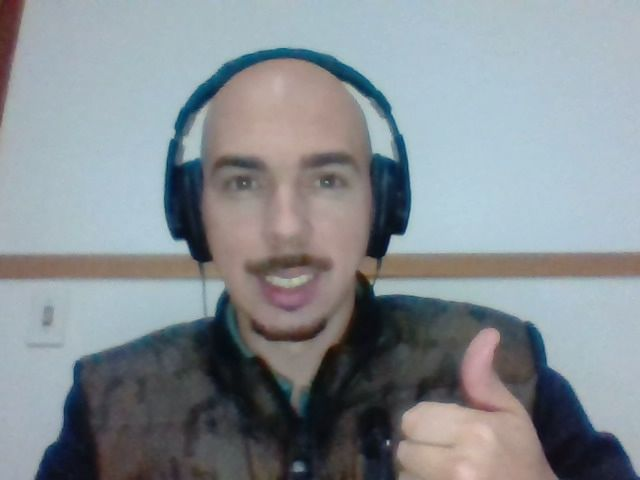

In [16]:
from IPython.display import Image
import os
image_path = "/content/drive/My Drive/Colab Notebooks/Colab_Lab2_2021/"
filename=os.path.join(image_path,'photo1.jpg')
quality=0.8
try:
  take_photo(filename, quality)

  print('Imagem gravada em {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Referência:

Adaptado de: **Colab Image Handling.** 
https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/colab/examples/Colab_Image_Handling.ipynb